In [2]:
print("Hello World")

Hello World


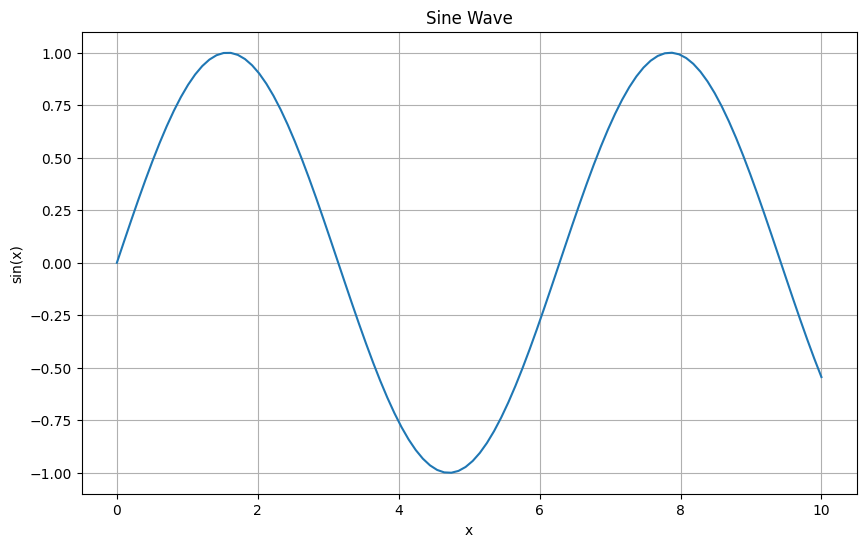

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# データの生成
x = np.linspace(0, 10, 100)
y = np.sin(x)

# プロットの作成
plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.title('Sine Wave')
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.grid(True)
plt.show()

C:\Users\ryutk\AppData\Local\Temp\ipykernel_17056\588878609.py:38: UserWarning: Glyph 36600 (\N{CJK UNIFIED IDEOGRAPH-8EF8}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ryutk\AppData\Local\Temp\ipykernel_17056\588878609.py:38: UserWarning: Glyph 32218 (\N{CJK UNIFIED IDEOGRAPH-7DDA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ryutk\AppData\Local\Temp\ipykernel_17056\588878609.py:38: UserWarning: Glyph 12464 (\N{KATAKANA LETTER GU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ryutk\AppData\Local\Temp\ipykernel_17056\588878609.py:38: UserWarning: Glyph 12521 (\N{KATAKANA LETTER RA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ryutk\AppData\Local\Temp\ipykernel_17056\588878609.py:38: UserWarning: Glyph 12501 (\N{KATAKANA LETTER HU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ryutk\AppData\Local\Temp\ipykernel_17056\588878609.py:38: UserWarning: Glyph 12392 (\N{HIRAGANA LETTER TO}) missing

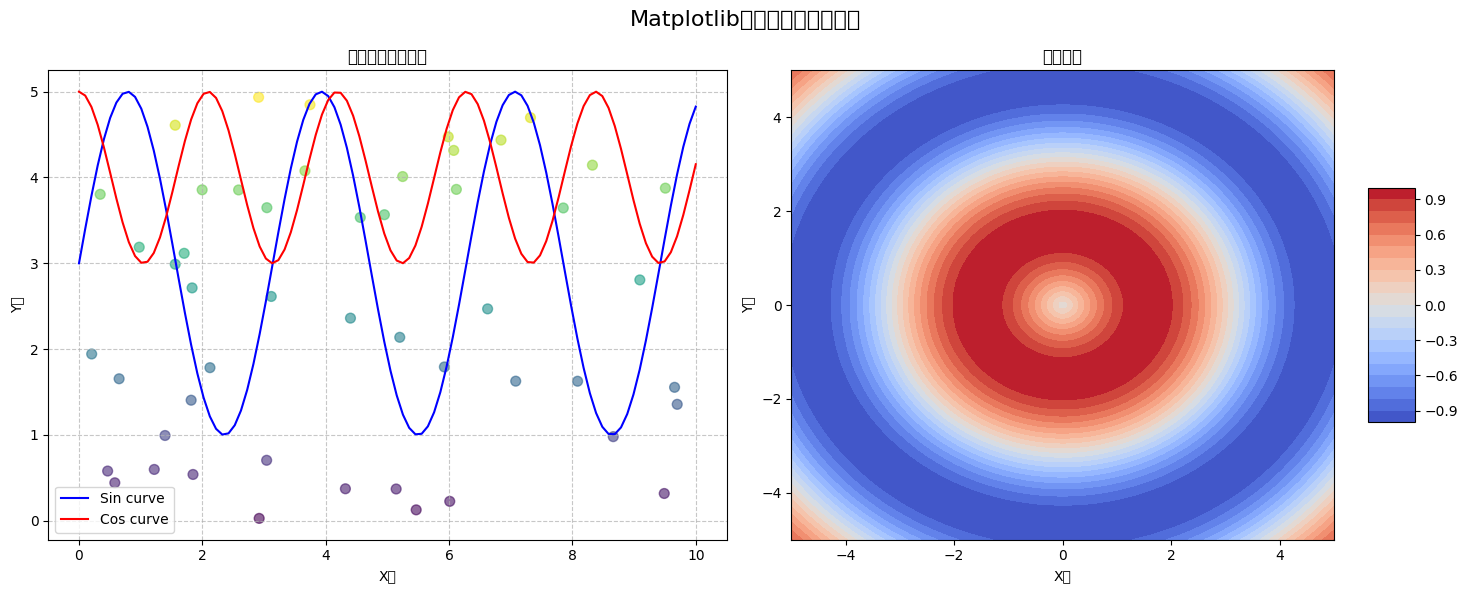

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

# データの準備
np.random.seed(42)
x = np.linspace(0, 10, 100)
y1 = 3 + 2*np.sin(2*x)
y2 = 4 + np.cos(3*x)
scatter_x = np.random.rand(50) * 10
scatter_y = np.random.rand(50) * 5

# プロットの設定
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Matplotlibを使った複合グラフ', fontsize=16)

# 左側のサブプロット: 線グラフと散布図
ax1.plot(x, y1, label='Sin curve', color='blue')
ax1.plot(x, y2, label='Cos curve', color='red')
ax1.scatter(scatter_x, scatter_y, c=scatter_y, cmap='viridis', s=50, alpha=0.6)
ax1.set_title('線グラフと散布図')
ax1.set_xlabel('X軸')
ax1.set_ylabel('Y軸')
ax1.legend()
ax1.grid(True, linestyle='--', alpha=0.7)

# 右側のサブプロット: 3D surface plot
X, Y = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
Z = np.sin(np.sqrt(X**2 + Y**2))

surf = ax2.contourf(X, Y, Z, cmap=cm.coolwarm, levels=20)
ax2.set_title('等高線図')
ax2.set_xlabel('X軸')
ax2.set_ylabel('Y軸')
fig.colorbar(surf, ax=ax2, shrink=0.5, aspect=5)

# レイアウトの調整と表示
plt.tight_layout()
plt.show()

In [1]:
%matplotlib nbagg
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# 評価関数
def fitness(x1, x2):
    z = x1 * x1 + x2 * x2
    #z = 2*x1**2 - 1.05*x1**4 + (x1**6)/6 + x1*x2 + x2**2
    return z

# 粒子の位置の更新を行う関数
def update_position(x1, x2, vx1, vx2):
    new_x1 = x1 + vx1
    new_x2 = x2 + vx2
    return new_x1, new_x2

# 粒子の速度の更新を行う関数
def update_velocity(x1, x2, vx1, vx2, p, g, w=0.5, rho_max=0.14):
    # パラメーターrhoはランダムに与える
    rho1 = random.uniform(0, rho_max)
    rho2 = random.uniform(0, rho_max)
    # 粒子速度の更新を行う
    new_vx1 = w * vx1 + rho1 * (p["x1"] - x1) + rho2 * (g["x1"] - x1)
    new_vx2 = w * vx2 + rho1 * (p["x2"] - x2) + rho2 * (g["x2"] - x2)
    return new_vx1, new_vx2

N = 100  # 粒子の数
x1_min, x1_max = -100, 100
x2_min, x2_max = -100, 100
#x1_min, x1_max = -2, 2
#x2_min, x2_max = -2, 2

# 粒子位置, 速度, パーソナルベスト, グローバルベストの初期化を行う
ps = [{"x1": random.uniform(x1_min, x1_max), "x2": random.uniform(x2_min, x2_max)} for i in range(N)]
vs = [{"x1": 0.0, "x2": 0.0} for i in range(N)]
personal_best_positions = ps
personal_best_scores = [fitness(p["x1"], p["x2"]) for p in ps]
best_particle = np.argmin(personal_best_scores)
global_best_position = personal_best_positions[best_particle]
#print(personal_best_positions)
#print(personal_best_scores)
#print(best_particle)
#print(global_best_position)

# アニメーション作成用
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$F(x)$')

x1_coord = np.linspace(x1_min, x1_max, 100)
x2_coord = np.linspace(x2_min, x2_max, 100)
X, Y = np.meshgrid(x1_coord, x2_coord)

ax.plot_wireframe(X, Y, fitness(X, Y), color='b',rstride=2, cstride=2, linewidth=0.3)
ims = []

T = 30  # 制限時間(ループの回数)
for t in range(T):
    for i in range(N):
        x1, x2 = ps[i]["x1"], ps[i]["x2"]
        vx1, vx2 = vs[i]["x1"], vs[i]["x2"]
        p = personal_best_positions[i]
        # 粒子の位置の更新を行う
        new_x1, new_x2 = update_position(x1, x2, vx1, vx2)
        ps[i] = {"x1": new_x1, "x2": new_x2}
        # 粒子の速度の更新を行う
        new_vx1, new_vx2 = update_velocity(
            new_x1, new_x2, vx1, vx2, p, global_best_position)
        vs[i] = {"x1": new_vx1, "x2": new_vx2}
        # 評価値を求め, パーソナルベストの更新を行う
        score = fitness(new_x1, new_x2)
        if score < personal_best_scores[i]:
            personal_best_scores[i] = score
            personal_best_positions[i] = {"x1": new_x1, "x2": new_x2}
    # グローバルベストの更新を行う
    best_particle = np.argmin(personal_best_scores)
    global_best_position = personal_best_positions[best_particle]
    im = ax.scatter3D([ps[i]["x1"] for i in range(N)],
                      [ps[i]["x2"] for i in range(N)],
                      [fitness(ps[i]["x1"], ps[i]["x2"]) for i in range(N)], c='r')
    ims.append([im])
ani = animation.ArtistAnimation(fig, ims)
ani.save('./anim_PSO1.gif', writer='pillow') 
# 最適解
print(global_best_position)
print(min(personal_best_scores))

<IPython.core.display.Javascript object>

{'x1': 0.13552674128477754, 'x2': -0.1065143454761196}
0.02971280339547719


In [6]:
print("自分のPCにこの仮想環境を移植してみました。")
print("これで授業で使ったOpenCVとかのライブラリの競合起こらないから安心して組めるな")
print("カーネルで色々揉め出したけど大丈夫よね")

自分のPCにこの仮想環境を移植してみました。
これで授業で使ったOpenCVとかのライブラリの競合起こらないから安心して組めるな
カーネルで色々揉め出したけど大丈夫よね


In [7]:
import pandas as pd